<a href="https://colab.research.google.com/github/filnels/Homeworks/blob/main/Disbalance_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,  roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score


from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# загрузим датасет glass
glass= pd.read_csv('glass.data', header=None)

# посмотрим данные
print(glass.head())

   0        1      2     3     4      5     6     7    8    9   10
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1


In [ ]:
# Удалим первый столбец с индексами, чтоб не дублировалась информация
glass_cleaned = glass.drop(columns=[0])

# Переиндексация строк, начиная с 1
glass_cleaned.index = glass_cleaned.index + 1
glass=glass_cleaned

print(glass)

          1      2     3     4      5     6     7     8    9   10
1    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   1
2    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   1
3    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   1
4    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   1
5    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...  ..
210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   7
211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   7
212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   7
213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   7
214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   7

[214 rows x 10 columns]


In [ ]:
# Зададим названия столбцов для удобства
glass.columns = [  'RI', 'Na', 'Mg', 'Al', 'Si',
   'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# Видим, что у нас 214 строки, пустых данных нет

In [ ]:
# посмотрим на информацию в  файле glass.names
with open('glass.names', 'r') as file:
    content = file.read()
print(content)

1. Title: Glass Identification Database

2. Sources:
    (a) Creator: B. German
        -- Central Research Establishment
           Home Office Forensic Science Service
           Aldermaston, Reading, Berkshire RG7 4PN
    (b) Donor: Vina Spiehler, Ph.D., DABFT
               Diagnostic Products Corporation
               (213) 776-0180 (ext 3014)
    (c) Date: September, 1987

3. Past Usage:
    -- Rule Induction in Forensic Science
       -- Ian W. Evett and Ernest J. Spiehler
       -- Central Research Establishment
          Home Office Forensic Science Service
          Aldermaston, Reading, Berkshire RG7 4PN
       -- Unknown technical note number (sorry, not listed here)
       -- General Results: nearest neighbor held its own with respect to the
             rule-based system

4. Relevant Information:n
      Vina conducted a comparison test of her rule-based system, BEAGLE, the
      nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is 
      a product available 

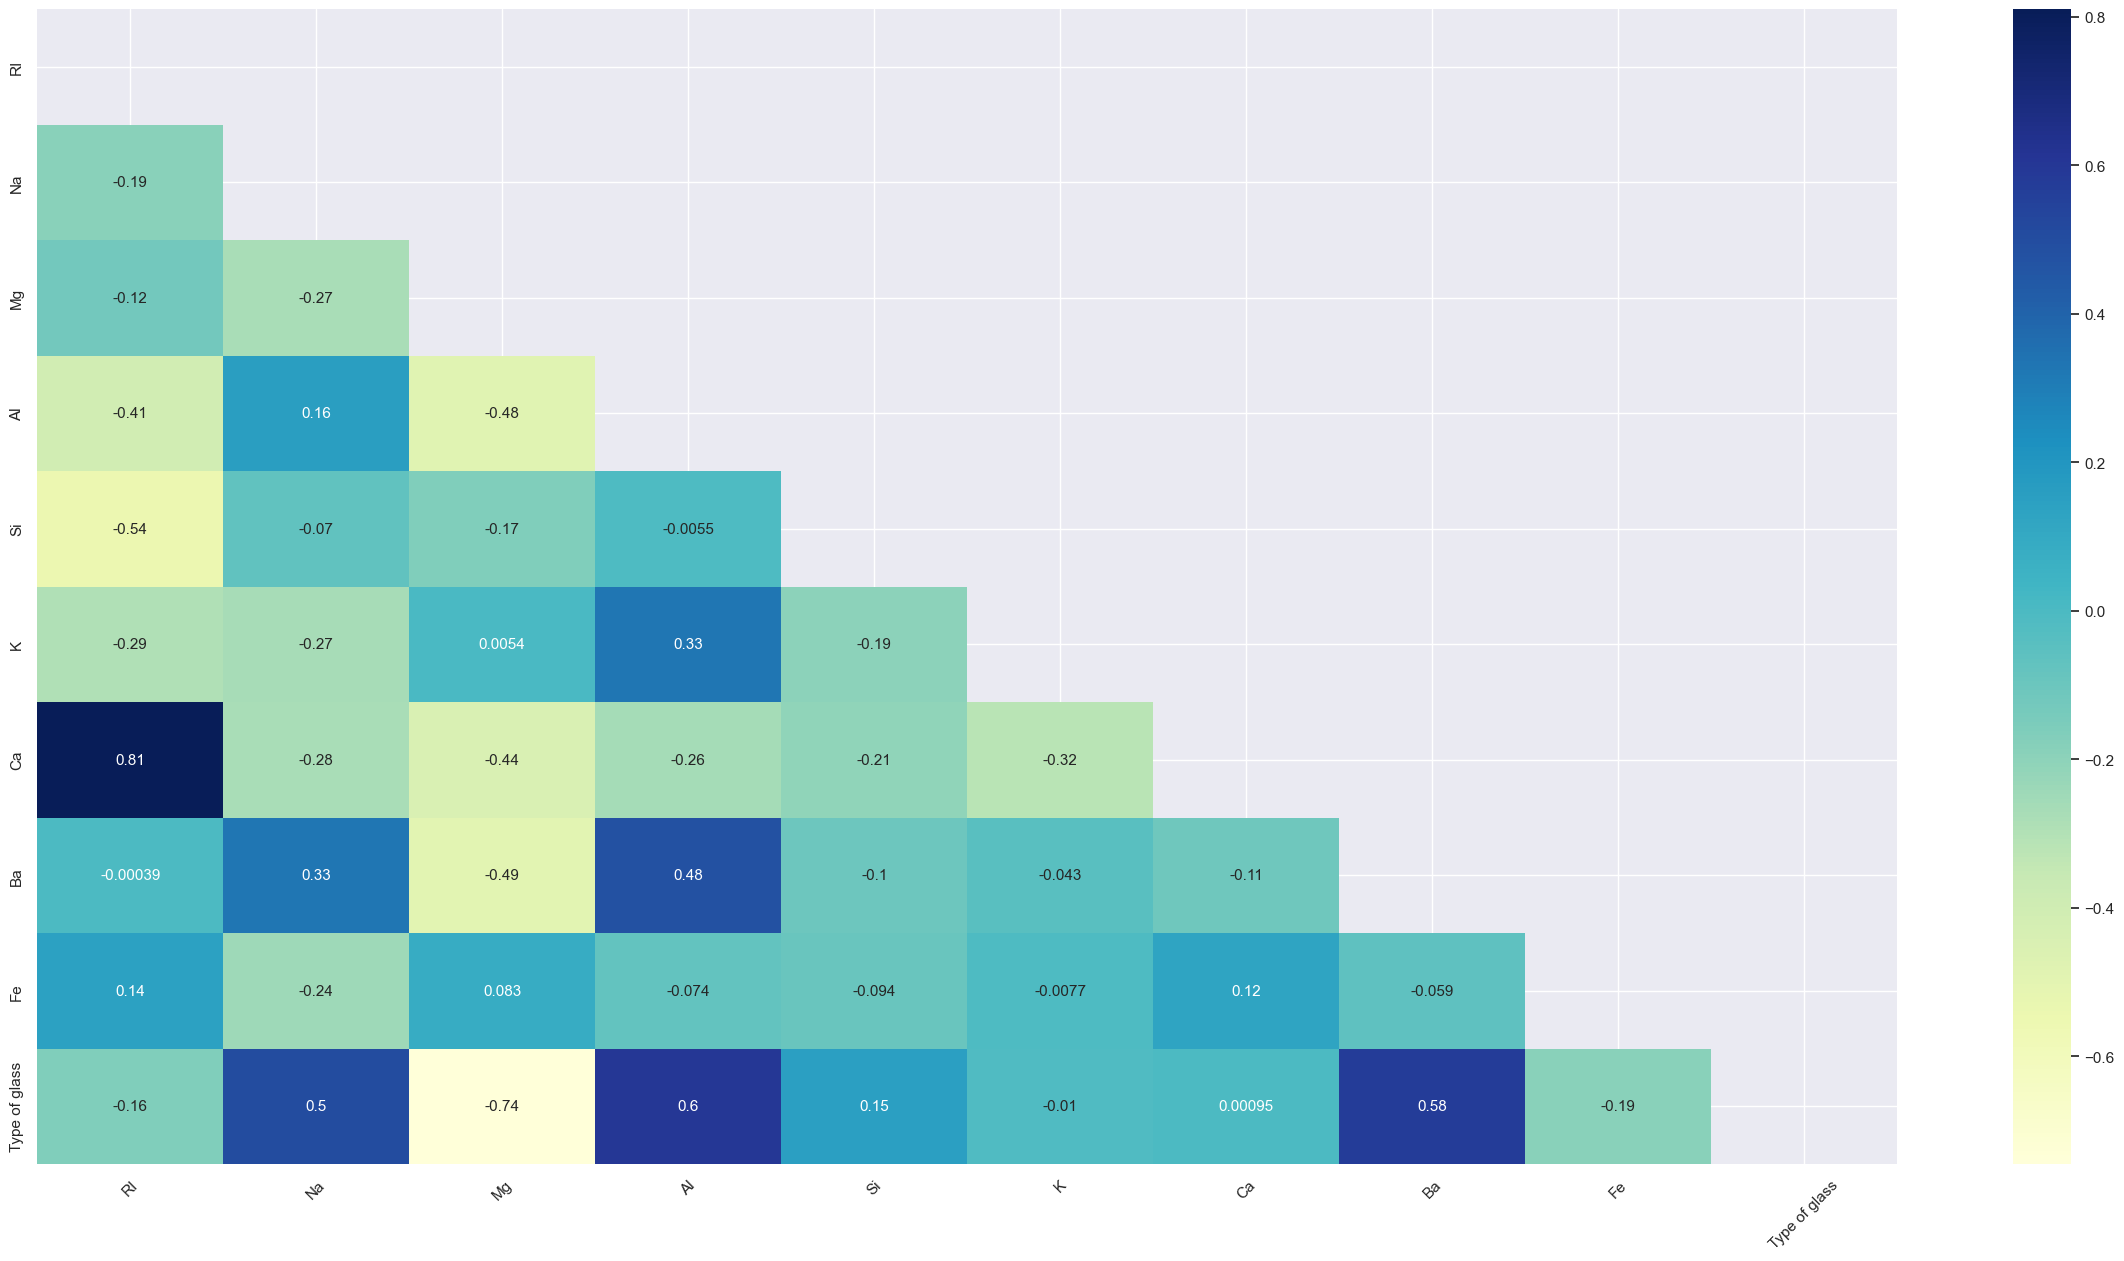

In [ ]:
# Построим матрицу корреляций при помощи  heatmap:

corr_matrix = glass.corr()

plt.figure(figsize=(30, 15))

mask = np.triu(corr_matrix)

sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# в большинстве признаков корреляции отсутствуют,
#видим некоторые корреляции признаков: RI: refractive index и Са -81%, АІ и Ва - 48%,
#а также с типом стекла видим средние зависимоти: с Na - 50%, c AI - 60%, с Ba - 58%
# Можно удалить Ca из данных, чтоб избежать переобучения данных

In [ ]:
glass = glass.drop('Ca', axis=1)


In [ ]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type of glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.0,1


In [ ]:
# посмотрим на сколько у нас сбалансированны данные - в каком количестве представлен каждый тип стекла

Text(0.5, 1.0, 'Распределение типов стекла')

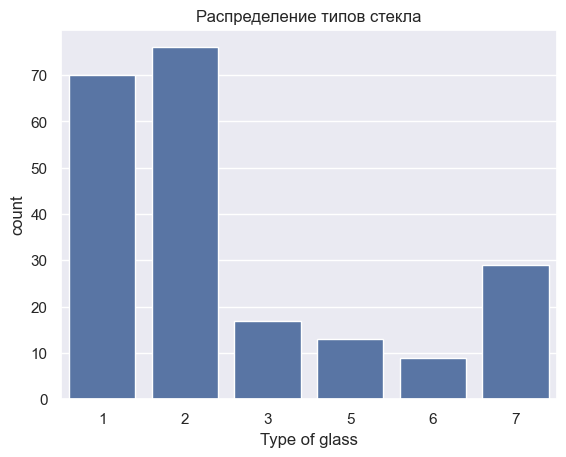

In [ ]:
sns.countplot(x='Type of glass', data=glass)
plt.title('Распределение типов стекла')

In [ ]:
# Видим, что 4-ый класс не представлен, больше всего представлен класс 1 и 2, посмотрим точное колличество экземпляров

In [ ]:
# Посчитаем количество экземпляров по каждому классу
class_counts = glass['Type of glass'].value_counts()

print(class_counts)


Type of glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [ ]:
# 1 - building_windows_float_processed (строительные окна из флоат-стекла, обработанные) - 70
# 2 - building_windows_non_float_processed (строительные окна из нефлоат-стекла, обработанные) - 76
# 3 -  vehicle_windows_float_processed (автомобильные окна из флоат-стекла, обработанные) - 17
# 4 -  vehicle_windows_non_float_processed (none in this database) (автомобильные окна из нефлоат-стекла (в базе данных отсутствуют)) - 0
# 5 - containers(контейнеры) - 13
# 6 -  tableware (столовая посуда) - 9
# 7 -  headlamps (фары) - 29

In [ ]:
# Построим сначала модель KNN на исходных данных

In [ ]:
# Разделим данные на признаки (X) и целевую переменную (y)
X = glass.drop('Type of glass', axis=1)  # Признаки
y = glass['Type of glass']  # Целевая переменная

# Разделим данные на обучающую и тестовую выборки, так как данных мало, разбивать и на валидационную не будем
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель KNN на несбалансированных данных
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


# Предсказание модели на тестовых данных
y_pred = knn.predict(X_test_scaled)

# Оценка модели
print('Несбалансированные данные:')
print(classification_report(y_test, y_pred))

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print('Точность модели KNN:', accuracy)


Несбалансированные данные:
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.74      0.93      0.82        15
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.79        43
   macro avg       0.89      0.68      0.73        43
weighted avg       0.82      0.79      0.78        43

Точность модели KNN: 0.7906976744186046


In [ ]:
#в целом средний результат,  мы видим, что для 3 - класса модель cмогла предсказать всего 33% результатов, для 6 класса - полнота всего 50%,
#следовательно наша модель только 50%, а это только один экхемпляр смогла правильна предсказать. ДЛя 1,2 и 7 класса модель дала вполне хорошее предсказание,
#как по точности, так и по полноте.

In [ ]:
#улучшим модель при помощи подборов наилучших гиперпараметров

In [ ]:
# Определим сетку гиперпараметров для KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Используем GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

#  Обучим KNN с лучшими гиперпараметрами
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_best = best_knn.predict(X_test_scaled)

# Оценка улучшенной модели
print("Улучшенная модель KNN:")
print(classification_report(y_test, y_pred_best))

# Оценка точности улучшенной модели
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Точность улучшенной модели KNN: {accuracy_best:.2f}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшие гиперпараметры: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Улучшенная модель KNN:
              precision    recall  f1-score   support

           1       0.71      0.86      0.77        14
           2       0.79      0.73      0.76        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.79      0.79        43
weighted avg       0.81      0.79      0.79        43

Точность улучшенной модели KNN: 0.79


In [ ]:
#мы видим, что при подборе гипермараметров, а именно metric: manhattan, n_neighbors: 9(хотя меня это смущает, слишком мало данных в наборе,
#чтоб применять 9 соседей), weights: 'distance', предсказание модели
#сильно улучшилось, хотя с 3-им классом все еще плохо, модель смогла предсказать только 33%.  Попробуем применить методы для балансировки наших данных

In [ ]:
#методы Undersampling  применить не можем (хотя эти методы намного безопаснее методов Oversampling)
#потому что мажорные классы превышают минорные всего в 4-7 раз. Применим методы Oversampling путем увеличения выбоки.
#Увеличение выборки заключается в добавлении дополнительных примеров класса-меньшинства, чтобы сделать его более представительным.
#Это можно сделать различными способами.

In [ ]:
 #RandomOverSampler - увеличение выборки путем дублирования существующих примеров

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Применим RandomOverSampler к обучающей выборке
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

# Проверим распределения классов после RandomOverSampler
print('Распределение классов после RandomOverSampler:', pd.Series(y_train_ros).value_counts())

# Определение сетки гиперпараметров для KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Используем GridSearchCV для подбора гиперпараметров
grid_search_ros = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_ros.fit(X_train_ros, y_train_ros)

# Лучшие гиперпараметры для KNN после RandomOverSampler
print('Лучшие гиперпараметры после RandomOverSampler: ', grid_search_ros.best_params_)

# Обучим модель KNN с лучшими гиперпараметрами на данных после RandomOverSampler
best_knn_ros = grid_search_ros.best_estimator_
best_knn_ros.fit(X_train_ros, y_train_ros)

# Предсказание на тестовых данных
y_pred_ros_best = best_knn_ros.predict(X_test_scaled)

# Оценка модели на данных после RandomOverSampler
print('Модель KNN с гиперпараметрами после RandomOverSampler:')
print(classification_report(y_test, y_pred_ros_best))

# Оценка точности модели
accuracy_ros_best = accuracy_score(y_test, y_pred_ros_best)
print('Точность модели KNN после RandomOverSampler:', accuracy_ros_best)


Распределение классов после RandomOverSampler: Type of glass
7    61
1    61
2    61
3    61
6    61
5    61
Name: count, dtype: int64
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшие гиперпараметры после RandomOverSampler:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Модель KNN с гиперпараметрами после RandomOverSampler:
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.82      0.60      0.69        15
           3       0.29      0.67      0.40         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.74        43
   macro avg       0.73      0.83      0.75        43
weighted avg       0.80      0.74      0.76        43

Точность модели KNN после RandomOverSampler: 0.7441860465116279


In [ ]:
#общая точность модели стала хуже, всего 74%, для 3-го класса полнота стала лучше, но точность ухудшилась, более полный анализ
#качества увидим на графике ROC_AUC крывых

In [ ]:
#b) Oversampling с использованием SMOTE (Synthetic Minority Over-sampling Technique) добавляет синтетические примеры для классов меньшинств.
#SMOTE работает путем генерации новых примеров класса-меньшинства на основе близлежащих соседей. Этот метод помогает сделать распределение классов
#более равномерным, сохраняя структуру данных.

In [ ]:
from imblearn.over_sampling import SMOTE

#  Применим SMOTE к обучающей выборке
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Проверим распределения классов после SMOTE
print('Распределение классов после SMOTE:', pd.Series(y_train_smote).value_counts())

#  Определим сетки гиперпараметров для KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Используем GridSearchCV для подбора гиперпараметров на сбалансированных данных
grid_search_smote = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_smote.fit(X_train_smote, y_train_smote)

# Лучшие гиперпараметры для KNN после SMOTE
print('Лучшие гиперпараметры после SMOTE:', grid_search_smote.best_params_)

#  Обучим модель KNN с лучшими гиперпараметрами на данных SMOTE
best_knn_smote = grid_search_smote.best_estimator_
best_knn_smote.fit(X_train_smote, y_train_smote)

#  Предсказание на тестовых данных
y_pred_smote_best = best_knn_smote.predict(X_test_scaled)

#  Оценка модели на сбалансированных данных
print('Модель KNN с гиперпараметрами после SMOTE:')
print(classification_report(y_test, y_pred_smote_best))

# Оценка точности модели
accuracy_smote_best = accuracy_score(y_test, y_pred_smote_best)
print('Точность модели KNN после SMOTE:', accuracy_smote_best)


Распределение классов после SMOTE: Type of glass
7    61
1    61
2    61
3    61
6    61
5    61
Name: count, dtype: int64
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшие гиперпараметры после SMOTE: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Модель KNN с гиперпараметрами после SMOTE:
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.82      0.60      0.69        15
           3       0.29      0.67      0.40         3
           5       0.60      1.00      0.75         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.72        43
   macro avg       0.70      0.80      0.72        43
weighted avg       0.79      0.72      0.74        43

Точность модели KNN после SMOTE: 0.7209302325581395


In [ ]:
# видим приблизительно такие же результаты

In [ ]:
# попробуем комбинацию методов  oversampling и undersampling для более точной балансировки. SMOTE+Tomek

In [ ]:
from imblearn.combine import SMOTETomek

# Применение SMOTE+Tomek к обучающей выборке
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_scaled, y_train)

# Создание KNN модели
knn = KNeighborsClassifier()

# Определение параметров для GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Количество соседей
    'weights': ['uniform', 'distance'],  # Веса соседей
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Метрика расстояний
}

# Использование GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro', verbose=1)

# Обучение модели с использованием лучших гиперпараметров
grid_search.fit(X_train_smote_tomek, y_train_smote_tomek)

# Лучшая модель после поиска
smote_tomek_best = grid_search.best_estimator_
smote_tomek_best.fit(X_train_smote, y_train_smote)

# Предсказание на тестовых данных
y_pred_smote_tomek = smote_tomek_best.predict(X_test_scaled)

# Оценка модели
print('Лучшая комбинация гиперпараметров:', grid_search.best_params_)
print('SMOTE+Tomek:')
print(classification_report(y_test, y_pred_smote_tomek))
# Оценка точности модели
accuracy_smote_tomek_best = accuracy_score(y_test, y_pred_smote_tomek)
print('Точность модели KNN после SMOTE_TOMEK:', accuracy_smote_tomek_best)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшая комбинация гиперпараметров: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
SMOTE+Tomek:
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.82      0.60      0.69        15
           3       0.29      0.67      0.40         3
           5       0.60      1.00      0.75         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.72        43
   macro avg       0.70      0.80      0.72        43
weighted avg       0.79      0.72      0.74        43

Точность модели KNN после SMOTE_TOMEK: 0.7209302325581395


In [ ]:
#ADASYN (Adaptive Synthetic Sampling). ADASYN работает аналогично SMOTE, но с добавлением адаптивности. Он уделяет больше внимания классам,
#которые более затруднительны для классификации, генерируя больше синтетических примеров для таких классов.
#ADASYN подходит для ситуаций, где дисбаланс классов меняется от примера к примеру,
#и помогает справиться с более сложными сценариями несбалансированных данных.

In [ ]:
from imblearn.over_sampling import ADASYN


# Применим ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# применим ADASYN  к обучающей выборке
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

# Проверим распределение классов после ADASYN
print('Распределение классов после ADASYN:', pd.Series(y_train_adasyn).value_counts())

# Определим сетку гиперпараметров для KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Используем GridSearchCV для подбора гиперпараметров
grid_search_adasyn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Лучшие гиперпараметры
print('Лучшие гиперпараметры после ADASYN:', grid_search_adasyn.best_params_)

# Обучим KNN с лучшими гиперпараметрами на данных после ADASYN
best_knn_adasyn = grid_search_adasyn.best_estimator_
best_knn_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Предсказание на тестовых данных
y_pred_adasyn_best = best_knn_adasyn.predict(X_test_scaled)

# Оценка модели
print('Модель KNN с гиперпараметрами после ADASYN:')
print(classification_report(y_test, y_pred_adasyn_best))

# Оценка точности модели
accuracy_adasyn_best = accuracy_score(y_test, y_pred_adasyn_best)
print('Точность модели KNN после ADASYN:', accuracy_adasyn_best)


Распределение классов после ADASYN: Type of glass
2    61
6    61
1    56
7    23
3    14
5    10
Name: count, dtype: int64
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшие гиперпараметры после ADASYN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Модель KNN с гиперпараметрами после ADASYN:
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.81      0.87      0.84        15
           3       0.50      0.33      0.40         3
           5       1.00      0.67      0.80         3
           6       0.50      1.00      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.77      0.75      0.73        43
weighted avg       0.81      0.79      0.79        43

Точность модели KNN после ADASYN: 0.7906976744186046


In [ ]:
# эта модель показала очень хорошие результаты, хорошее соотношение между precision и recall

In [ ]:
#Применим Cost-sensitive learning. Этот метод назначает разные веса различным классам в зависимости от их важности.
#Например, классу-меньшинству можно присвоить больший вес, чтобы модель более активно учила его представления.

In [ ]:
# Определим веса классов  на основе частоты классов
class_counts = y_train.value_counts().to_dict()  # Количество элементов каждого класса
total_samples = len(y_train)  # Общее количество элементов
class_weights = {k: total_samples / (len(class_counts) * v) for k, v in class_counts.items()}


print('Вес каждого класса: ', class_weights)

# Применим веса с учетом распределения классов
sample_weights = y_train.map(class_weights)

# Определим сетку гиперпараметров для KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Используем GridSearchCV для подбора гиперпараметров, но без передачи sample_weight
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Обучаем модель на тренировочных данных без sample_weight
grid_search.fit(X_train_scaled, y_train)

# Выводим лучшие гиперпараметры
print('Лучшие гиперпараметры:', grid_search.best_params_)

# Обучим KNN с лучшими гиперпараметрами
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Функция взвешенного предсказания
def weighted_predict(X_test, knn_model, class_weights):
    preds = knn_model.predict(X_test)
    weighted_preds = []

    for i, pred in enumerate(preds):
        weight = class_weights.get(pred, 1)  # Присваиваем вес предсказанному классу
        weighted_preds.append(pred if np.random.rand() < weight else np.random.choice(list(class_weights.keys())))

    return np.array(weighted_preds)

# Предсказание с учетом весов
y_pred_weighted = weighted_predict(X_test_scaled, best_knn, class_weights)

# Оценка модели
print("Классификация с учетом весов классов:")
print(classification_report(y_test, y_pred_weighted))

# Оценка точности модели
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f'Точность модели KNN с учетом весов: {accuracy_weighted:.2f}')



Вес каждого класса:  {2: 0.4672131147540984, 1: 0.5089285714285714, 7: 1.2391304347826086, 3: 2.0357142857142856, 5: 2.85, 6: 4.071428571428571}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшие гиперпараметры: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Классификация с учетом весов классов:
              precision    recall  f1-score   support

           1       0.57      0.29      0.38        14
           2       0.75      0.60      0.67        15
           3       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.29      1.00      0.44         2
           7       0.45      0.83      0.59         6

    accuracy                           0.56        43
   macro avg       0.55      0.68      0.56        43
weighted avg       0.61      0.56      0.55        43

Точность модели KNN с учетом весов: 0.56


In [ ]:
# модель дала самые неудачные результаты, поэтому не будем ее включать в сравнительный анализ качества методов улучшения баланса классов

In [ ]:
#так как использую модель KNN для сравнения результатов различных методов балансировки, некоторые другие методы, наример SVM Smote не
#получится использовать.

In [ ]:
# постром кривые ROC для всех методов балансировки в сравнение без балансировки

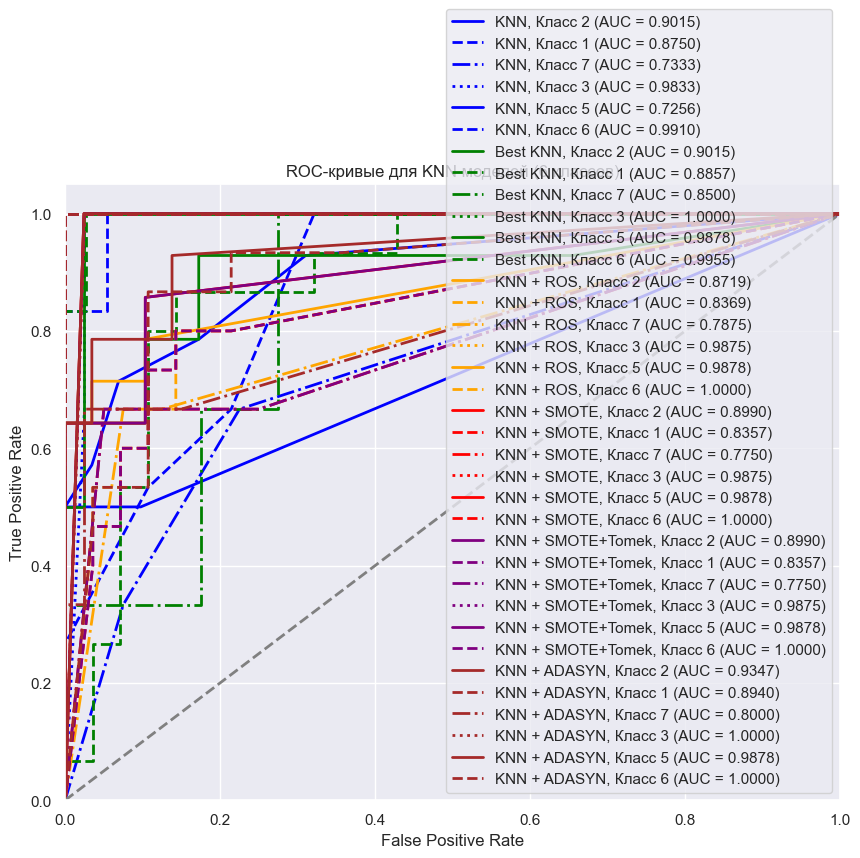

Точность KNN на несбалансированных данных: 0.7906976744186046
Точность KNN с улучшенными гиперпараметрами: 0.7906976744186046
Точность KNN после RandomOverSampler: 0.7441860465116279
Точность KNN после SMOTE: 0.7209302325581395
Точность KNN после SMOTE+Tomek: 0.7209302325581395
Точность KNN после ADASYN: 0.7906976744186046


In [ ]:
from sklearn.preprocessing import label_binarize

# Проверим на  обучение модели (выдавало ошибку, что  не обучена KNN)
if not hasattr(knn, 'classes_'):
    knn.fit(X_train_scaled, y_train)

if not hasattr(best_knn, 'classes_'):
    best_knn.fit(X_train_scaled, y_train)

if not hasattr(best_knn_ros, 'classes_'):
    best_knn_ros.fit(X_train_ros, y_train_ros)

if not hasattr(best_knn_smote, 'classes_'):
    best_knn_smote.fit(X_train_smote, y_train_smote)

if not hasattr(smote_tomek_best, 'classes_'):
    smote_tomek_best.fit(X_train_smote, y_train_smote)

if not hasattr(best_knn_adasyn, 'classes_'):
    best_knn_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Бинаризация меток классов для многоклассовой ROC-кривой (6 классов)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Посчитаем вероятности классов для всех моделей
y_prob_knn = knn.predict_proba(X_test_scaled)
y_prob_best_knn = best_knn.predict_proba(X_test_scaled)
y_prob_ros_best_knn = best_knn_ros.predict_proba(X_test_scaled)
y_prob_smote_best_knn = best_knn_smote.predict_proba(X_test_scaled)
y_prob_smote_tomek_best_knn = smote_tomek_best.predict_proba(X_test_scaled)
y_prob_adasyn_best_knn = best_knn_adasyn.predict_proba(X_test_scaled)


models = {
    'KNN': y_prob_knn,
    'Best KNN': y_prob_best_knn,
    'KNN + ROS': y_prob_ros_best_knn,
    'KNN + SMOTE': y_prob_smote_best_knn,
    'KNN + SMOTE+Tomek': y_prob_smote_tomek_best_knn,
    'KNN + ADASYN': y_prob_adasyn_best_knn
}

# Реальные метки классов
class_labels = [2, 1, 7, 3, 5, 6]

# цвет каждой модели
model_colors = {
    'KNN': 'blue',
    'Best KNN': 'green',
    'KNN + ROS': 'orange',
    'KNN + SMOTE': 'red',
    'KNN + SMOTE+Tomek': 'purple',
    'KNN + ADASYN': 'brown'
}

# Различные стили линии для классов
line_styles = {
    2: 'solid',     # сплошная линия для класса 2
    1: 'dashed',    # пунктирная линия для класса 1
    7: 'dashdot',   # точка-пунктир для класса 7
    3: 'dotted',    # точечная линия для класса 3
    5: 'solid',     # сплошная линия для класса 5
    6: 'dashed'     # пунктирная линия для класса 6
}

# переменные для хранения результатов
fpr = {}
tpr = {}
roc_auc = {}

# Вычисление ROC-кривых и AUC для каждой модели и каждого класса
plt.figure(figsize=(10, 8))

for model_name, y_prob in models.items():
    fpr[model_name] = {}
    tpr[model_name] = {}
    roc_auc[model_name] = {}

    for idx, class_label in enumerate(class_labels):  # Используем реальные метки классо
        fpr[model_name][class_label], tpr[model_name][class_label], _ = roc_curve(y_test_bin[:, idx], y_prob[:, idx])
        roc_auc[model_name][class_label] = auc(fpr[model_name][class_label], tpr[model_name][class_label])

    # Построение ROC-кривых для каждой модели
    for idx, class_label in enumerate(class_labels):
        plt.plot(
            fpr[model_name][class_label], tpr[model_name][class_label],
            color=model_colors[model_name], linestyle=line_styles[class_label], lw=2,
            label=f'{model_name}, Класс {class_label} (AUC = {roc_auc[model_name][class_label]:.4f})'
        )


# Диагональная линия
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для KNN моделей (6 классов)')
plt.legend(loc="lower right")
plt.show()

# Оценка точности для всех моделей
print('Точность KNN на несбалансированных данных:', accuracy_score(y_test, y_pred))
print('Точность KNN с улучшенными гиперпараметрами:', accuracy_score(y_test, y_pred_best))
print('Точность KNN после RandomOverSampler:', accuracy_ros_best)
print('Точность KNN после SMOTE:', accuracy_smote_best)
print('Точность KNN после SMOTE+Tomek:', accuracy_smote_tomek_best)
print('Точность KNN после ADASYN:', accuracy_adasyn_best)

In [ ]:
# из графиков видим, что лучшие результаты (в порядке убывания) показали методы: Adasyn, Smote, Smote+Tomek, далее идет улучшенный KNN, в обычном KNN для
#классов с несбалансированными данными, модель показывает аномальный вид кривой

In [ ]:
#посмотрим отдельно на график для методв SMOTE+KNN, потому что из-за наложения линий на предыдущем графике не совсем понятно

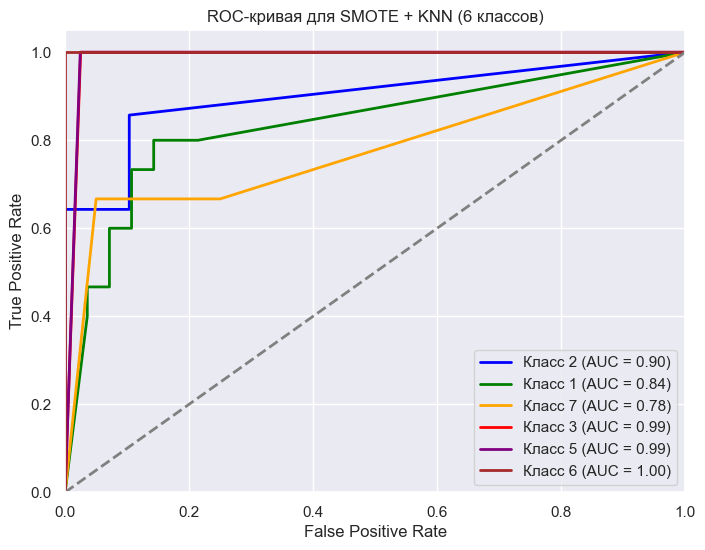

In [ ]:
# Реальные метки классов
class_labels = [2, 1, 7, 3, 5, 6]

# Подсчёт ROC-кривых и AUC для SMOTE + KNN
fpr_smote_knn = {}
tpr_smote_knn = {}
roc_auc_smote_knn = {}

# Цвета для каждого класса
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

# Рассчитаем ROC и AUC для каждого класса
for i, class_label in enumerate(class_labels):
    fpr_smote_knn[class_label], tpr_smote_knn[class_label], _ = roc_curve(y_test_bin[:, i], y_prob_smote_best_knn[:, i])
    roc_auc_smote_knn[class_label] = auc(fpr_smote_knn[class_label], tpr_smote_knn[class_label])

# Построение графика для SMOTE + KNN
plt.figure(figsize=(8, 6))

# Для каждого класса строим кривую
for i, class_label in enumerate(class_labels):
    plt.plot(fpr_smote_knn[class_label], tpr_smote_knn[class_label], color=colors[i], lw=2,
             label=f'Класс {class_label} (AUC = {roc_auc_smote_knn[class_label]:.2f})')

# Диагональная линия
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для SMOTE + KNN (6 классов)')
plt.legend(loc="lower right")
plt.grid(True)


plt.show()

In [ ]:
#видим, что лучшие результаты получили для класса 6(столовая посуда),5(контейнеры) и 3(автомобильные окна из флоат-стекла),
#для класса 1(строительные окна из флоат) и 2(строительные окна из нефлоат) тоже не плохие результаты, хуже результаты для класса 7


In [ ]:
#таким образом, мы видим что методы балансировки значительно улучшили предсказания модели KNN. К сожалению сразу невозможно
#сказать, какой метод сработает лучше, поэтому предварительно нужно делать анализ методов. Интересно было посмотреть
#те же методы на модели KNN, в которой гиперпараметром является радиус, это будет темой дальнейшего анализа.